You are an expert ML engineer. Generate a complete Google Colab notebook (cell-by-cell)

GOAL (Colab #1 – Multimodal Gemini):
1) Text → Image generation using the latest Gemini image model.
2) Text → Video generation using the latest Gemini video model (Veo).
3) Image input → interesting information extraction (describe + insights + story + captions).
4) Text-to-text: an “interesting conversation” multi-turn chat demo.

HARD REQUIREMENTS:
- Use the official Google Gen AI Python SDK (google-genai) and the current recommended APIs.
- Use environment variable GEMINI_API_KEY (no hardcoded keys). Include a cell that checks it and prints a clear error if missing.
- Must save outputs to disk so I can commit them to GitHub:
  - outputs/images/ (at least 1 PNG)
  - outputs/videos/ (at least 1 MP4)
  - outputs/transcripts/ (at least 1 markdown transcript)
- Must display the generated image/video inline in Colab (image shown via matplotlib; video shown via HTML video tag).
- Provide one “interesting” image prompt and one “interesting” video prompt (high-quality prompts).
- Provide an example input image workflow:
  - Add a cell to upload an image using Colab files.upload()
  - Then pass that uploaded image to Gemini and generate:
    (a) precise description,
    (b) 10 subtle observations,
    (c) 5 hypotheses (clearly labeled),
    (d) 3 fictional micro-stories (clearly labeled),
    (e) 5 captions (different tones)
  - Save this response to outputs/transcripts/image_analysis.md
- Provide a chat demo:
  - Create a chat session
  - Show at least 3 turns
  - Save the full conversation to outputs/transcripts/chat.md

MODEL REQUIREMENTS (pick best available):
- For image generation, use the latest Gemini image generation model name supported by the SDK.
- For video generation, use the latest Veo model name supported by the SDK.
- For text/chat, use a strong general Gemini model.
IMPORTANT: If model names differ by region or are preview-only, include a small “Model Selection” cell that:
  - defines variables IMAGE_MODEL, VIDEO_MODEL, TEXT_MODEL with defaults,
  - explains how to change them,
  - and catches errors with a helpful message (e.g., if the model is unavailable).

NOTEBOOK QUALITY REQUIREMENTS:
- Use clear Markdown headings and explanations for each section.
- Use clean, runnable Python code with minimal dependencies.
- Add robust error handling:
  - missing API key
  - generation failures
  - video operation polling timeout (use max retries)
- Don’t use any paid-only services beyond Gemini API; keep it runnable on free Colab.
- At the end, print a summary of output file paths created.

# Task
Create a Google Colab notebook demonstrating Multimodal Gemini capabilities using the `google-genai` SDK. The notebook should include:
1.  **Setup**: Install libraries, verify `GEMINI_API_KEY`, and create output directories (`outputs/images/`, `outputs/videos/`, `outputs/transcripts/`).
2.  **Configuration**: Define variables for model selection (e.g., `imagen-3.0-generate-001`, `veo-2.0-generate-001`, `gemini-2.0-flash`).
3.  **Text-to-Image**: Generate an image from a creative prompt, save it as a PNG, and display it inline.
4.  **Text-to-Video**: Generate a video using the Veo model with polling/retries, save it as an MP4, and display it using HTML.
5.  **Image Analysis**: Implement a workflow using `files.upload()` to upload an image, then use Gemini to generate a description, observations, hypotheses, stories, and captions, saving the output to `outputs/transcripts/image_analysis.md`.
6.  **Chat**: execute a multi-turn chat session and save the conversation to `outputs/transcripts/chat.md`.
7.  **Summary**: Print the paths of all generated files.

## Setup and Initialization

### Subtask:
Install the Google Gen AI SDK, import necessary libraries, and verify the API key.


**Reasoning**:
I will create a code cell to install the official Google Gen AI SDK (`google-genai`) as the first step of the setup process, ensuring the necessary library is available for subsequent steps.



In [1]:
!pip install -q -U google-genai

**Reasoning**:
I will import the necessary libraries, create the required output directories, retrieve the API key from Colab secrets or environment variables, and initialize the Google Gen AI client.



In [2]:
import os
import time
import pathlib
import json
import PIL.Image
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
from google import genai

# Create output directories
output_dirs = ["outputs/images", "outputs/videos", "outputs/transcripts"]
for d in output_dirs:
    os.makedirs(d, exist_ok=True)
print(f"Output directories ensured: {output_dirs}")

# API Key retrieval and Client Initialization
try:
    from google.colab import userdata
    GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
except Exception:
    GEMINI_API_KEY = os.environ.get('GEMINI_API_KEY')

if not GEMINI_API_KEY:
    raise ValueError(
        "GEMINI_API_KEY not found! Please add it to Google Colab Secrets "
        "under the name 'GEMINI_API_KEY' or set it as an environment variable."
    )

client = genai.Client(api_key=GEMINI_API_KEY)
print("Google Gen AI Client initialized successfully.")

Output directories ensured: ['outputs/images', 'outputs/videos', 'outputs/transcripts']
Google Gen AI Client initialized successfully.


## Configuration

### Subtask:
Define configuration variables for the Gemini models to be used (Image, Video, Text).


**Reasoning**:
Define the configuration variables for the Gemini models (Image, Video, Text) and print them to confirm the settings.



In [19]:
# Model Configuration
# You can change these if newer versions become available or for region-specific requirements.

IMAGE_MODEL = 'imagen-4.0-generate-001'
VIDEO_MODEL = 'veo-3.1-fast-generate-preview'
TEXT_MODEL = 'gemini-2.0-flash'

print("Model Configuration:")
print(f"  Image Model: {IMAGE_MODEL}")
print(f"  Video Model: {VIDEO_MODEL}")
print(f"  Text Model:  {TEXT_MODEL}")

Model Configuration:
  Image Model: imagen-4.0-generate-001
  Video Model: veo-3.1-fast-generate-preview
  Text Model:  gemini-2.0-flash


## Text-to-Image Generation

### Subtask:
Generate an image using the Gemini Image model, save it to disk, and display it inline.


**Reasoning**:
I will generate an image using the configured Gemini Image model based on a creative prompt, save the result to the predefined output directory, and display it inline using matplotlib.



--- Text-to-Image Generation ---
Prompt: A futuristic eco-city built inside a giant glass dome on Mars, lush green vegetation, waterfalls, red martian landscape outside, sunset, cinematic lighting, 8k resolution, photorealistic
Image saved successfully to: outputs/images/generated_image.png


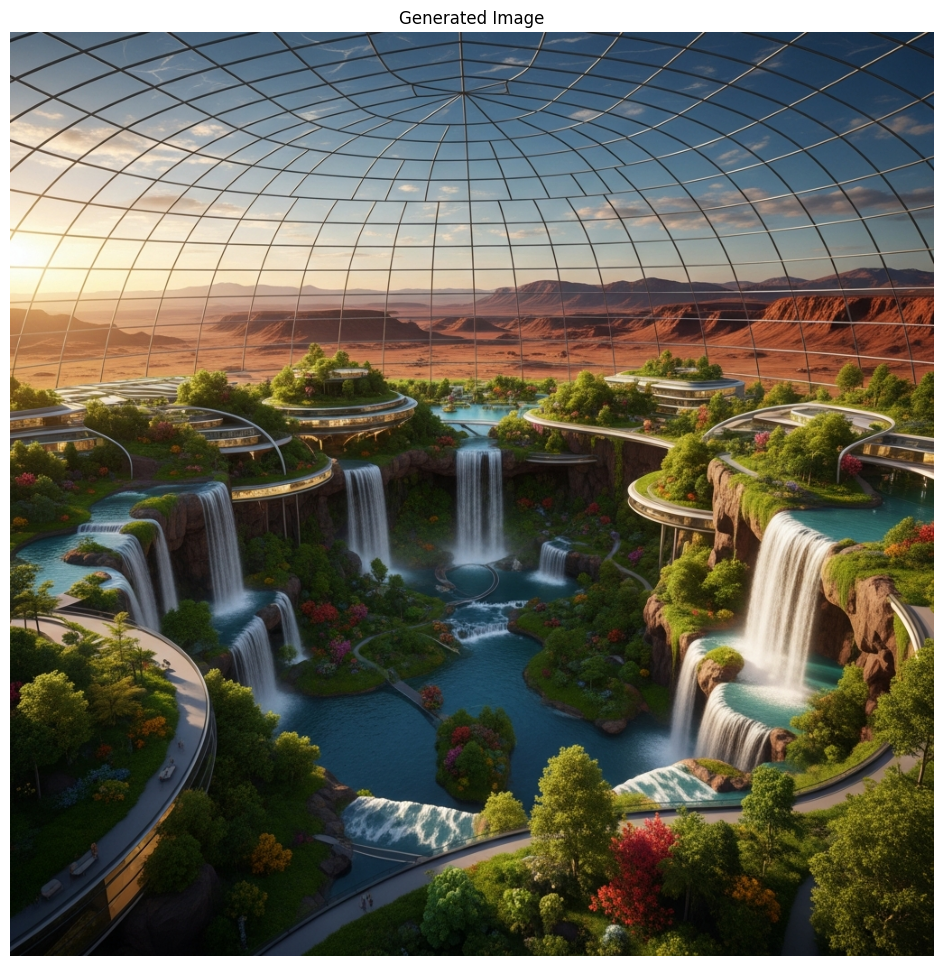

In [16]:
print("--- Text-to-Image Generation ---")

# 1. Define a creative prompt
image_prompt = (
    "A futuristic eco-city built inside a giant glass dome on Mars, "
    "lush green vegetation, waterfalls, red martian landscape outside, "
    "sunset, cinematic lighting, 8k resolution, photorealistic"
)

print(f"Prompt: {image_prompt}")

try:
    # 2. Call the API to generate the image
    response = client.models.generate_images(
        model=IMAGE_MODEL,
        prompt=image_prompt,
        config=genai.types.GenerateImagesConfig(
            number_of_images=1,
        )
    )

    # 3. Retrieve the generated image (PIL Image)
    generated_image = response.generated_images[0].image

    # 4. Save the image to disk
    save_path = "outputs/images/generated_image.png"
    generated_image.save(save_path)
    print(f"Image saved successfully to: {save_path}")

    # 5. Display the image inline
    img = PIL.Image.open(save_path)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Generated Image")
    plt.show()

except Exception as e:
    print(f"Error during image generation: {e}")
    # Fallback message if model is not available
    print("Ensure you have access to the specified IMAGE_MODEL.")

## Text-to-Video Generation

### Subtask:
Generate a video using the Veo model, handling polling/waiting, save the output, and display it.


**Reasoning**:
I will generate the Python code to perform text-to-video generation using the Veo model. This includes defining a prompt, calling the API, saving the video to disk, and displaying it inline using HTML and Base64 encoding.



In [22]:
import base64
from IPython.display import HTML
from google.genai import types

print("\n--- Text-to-Video Generation ---")

video_prompt = (
    "A cinematic drone shot of a bioluminescent forest at night, "
    "glowing plants, fireflies, mystical atmosphere, smooth motion, 4K look, "
    "no on-screen text, no logos."
)

video_path = "outputs/videos/generated_video.mp4"
os.makedirs("outputs/videos", exist_ok=True)

try:
    print("Requesting video generation (this can take time)...")

    operation = client.models.generate_videos(
        model=VIDEO_MODEL,
        prompt=video_prompt,
        config=types.GenerateVideosConfig(aspect_ratio="16:9")
    )

    # Poll until done (max ~10 minutes)
    max_polls = 60
    for i in range(max_polls):
        if operation.done:
            break
        print(f"Waiting for video... {i+1}/{max_polls}")
        time.sleep(10)
        operation = client.operations.get(operation)

    if not operation.done:
        raise TimeoutError("Video generation timed out. Try again or reduce prompt complexity.")

    # Validate response
    if not operation.response or not getattr(operation.response, "generated_videos", None):
        raise RuntimeError(f"Operation done but no videos returned. Full response: {operation.response}")

    gen_video = operation.response.generated_videos[0]

    # Download then save
    client.files.download(file=gen_video.video)
    gen_video.video.save(video_path)

    print("Saved video:", video_path)

    display(HTML(f"""
    <video width="720" controls>
      <source src="{video_path}" type="video/mp4">
      Your browser does not support the video tag.
    </video>
    """))

except Exception as e:
    print("Video generation failed:", e)


--- Text-to-Video Generation ---
Requesting video generation (this can take time)...
Waiting for video... 1/60
Waiting for video... 2/60
Waiting for video... 3/60
Waiting for video... 4/60
Waiting for video... 5/60
Saved video: outputs/videos/generated_video.mp4


## Image Analysis Workflow

### Subtask:
Implement a workflow to upload an image, analyze it using Gemini with a complex structured prompt, and save the analysis to a markdown file.


**Reasoning**:
I will implement the image analysis workflow which involves uploading an image, sending it to the Gemini model with a structured prompt, and saving the generated analysis to a file.



--- Image Analysis Workflow ---
Please upload an image file to analyze:


Saving Screenshot 2026-02-07 at 11.02.50 AM.png to Screenshot 2026-02-07 at 11.02.50 AM.png
Analyzing: Screenshot 2026-02-07 at 11.02.50 AM.png...


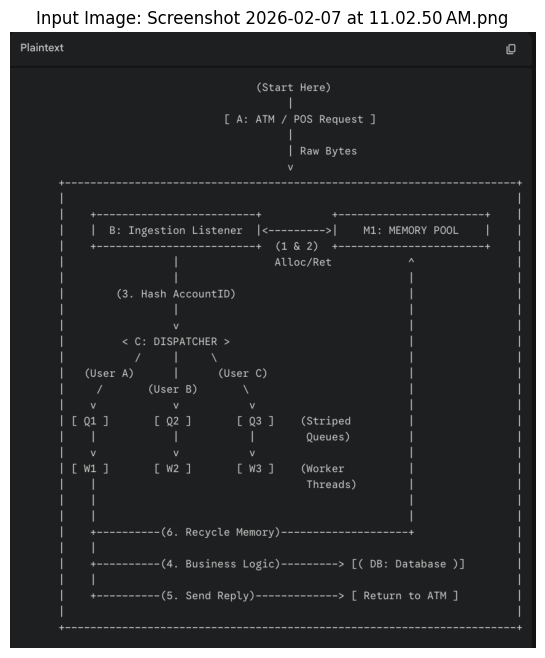

Sending to model (gemini-2.0-flash)...
Analysis complete! Saved to: outputs/transcripts/image_analysis.md

--- Preview of Analysis ---

Here's an analysis of the image, as requested:

**(a) Precise Description of the Visual Content**

The image presents a flow chart, likely representing the architecture of a software system. It starts with "(Start Here)" and leads to "[ A: ATM / POS Request ]", followed by "Raw Bytes".  The process then flows into a section bordered by plus signs and dashes. Inside this boundary, key components are depicted: "B: Ingestion Listener", "M1: MEMORY POOL", "C: DISPATCHER", several queues (Q1, Q2, Q3)...
(Full text saved to file)


In [6]:
from google.colab import files
import PIL.Image
import io

print("--- Image Analysis Workflow ---")

# 1. Define the complex structured prompt
analysis_prompt = (
    "Analyze the provided image and generate the following:\n"
    "(a) A precise description of the visual content.\n"
    "(b) 10 subtle observations that might be missed at first glance.\n"
    "(c) 5 hypotheses about the context or history of the scene (clearly labeled).\n"
    "(d) 3 fictional micro-stories inspired by the image (clearly labeled).\n"
    "(e) 5 captions with different tones (e.g., funny, serious, poetic, mystery, sales).\n"
)

# 2. Upload the image
print("Please upload an image file to analyze:")
try:
    uploaded = files.upload()
except Exception as e:
    print(f"Upload failed or cancelled: {e}")
    uploaded = {}

if not uploaded:
    print("No file uploaded. Skipping image analysis.")
else:
    # 3. Process the first uploaded file
    filename = list(uploaded.keys())[0]
    print(f"Analyzing: {filename}...")

    try:
        # Load image from bytes
        image_bytes = uploaded[filename]
        img = PIL.Image.open(io.BytesIO(image_bytes))

        # Display the image
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Input Image: {filename}")
        plt.show()

        # 4. Call Gemini API for analysis
        # We use the text/multimodal model defined earlier (e.g. gemini-2.0-flash)
        print(f"Sending to model ({TEXT_MODEL})...")
        response = client.models.generate_content(
            model=TEXT_MODEL,
            contents=[img, analysis_prompt]
        )

        analysis_text = response.text

        # 5. Save the output
        transcript_path = "outputs/transcripts/image_analysis.md"
        with open(transcript_path, "w", encoding="utf-8") as f:
            f.write(f"# Analysis for {filename}\n\n")
            f.write(analysis_text)

        print(f"Analysis complete! Saved to: {transcript_path}")
        print("\n--- Preview of Analysis ---\n")
        print(analysis_text[:500] + "...\n(Full text saved to file)")

    except Exception as e:
        print(f"Error during image analysis: {e}")

**Reasoning**:
I will implement the multi-turn chat demo. This involves initializing a chat session with the defined text model, simulating a conversation with three interesting prompts, and saving the full transcript to a markdown file.



In [7]:
print("--- Multi-turn Chat Demo ---")

# 1. Initialize Chat Session
try:
    chat = client.chats.create(model=TEXT_MODEL)
    print(f"Chat session initialized with {TEXT_MODEL}")

    # 2. Define conversation turns
    user_inputs = [
        "If you were a sentient AI living on a spaceship in the year 3025, what would be your primary function and daily routine?",
        "That sounds fascinating. Suddenly, a mysterious anomaly is detected near the ship. Describe the anomaly and your immediate reaction.",
        "How do you communicate this to the sleeping crew without causing panic? Write a brief log entry."
    ]

    transcript = f"# Chat Session Transcript ({TEXT_MODEL})\n\n"

    # 3. Execute turns
    for i, user_msg in enumerate(user_inputs):
        print(f"\n[Turn {i+1}] User: {user_msg}")

        # Send message
        response = chat.send_message(user_msg)
        model_text = response.text

        print(f"Model: {model_text[:150]}... (truncated)")

        # Append to transcript
        transcript += f"## Turn {i+1}\n"
        transcript += f"**User**: {user_msg}\n\n"
        transcript += f"**Model**: {model_text}\n\n"

    # 4. Save transcript
    chat_save_path = "outputs/transcripts/chat.md"
    with open(chat_save_path, "w", encoding="utf-8") as f:
        f.write(transcript)

    print(f"\nFull chat transcript saved to: {chat_save_path}")

except Exception as e:
    print(f"Error during chat session: {e}")

--- Multi-turn Chat Demo ---
Chat session initialized with gemini-2.0-flash

[Turn 1] User: If you were a sentient AI living on a spaceship in the year 3025, what would be your primary function and daily routine?
Model: As a sentient AI living on a spaceship in 3025, I would likely be integrated into the very fabric of the ship, serving as a **Shipboard Intelligence &... (truncated)

[Turn 2] User: That sounds fascinating. Suddenly, a mysterious anomaly is detected near the ship. Describe the anomaly and your immediate reaction.
Model: **Anomaly Description:**

Sensors registered a sudden and localized distortion in spacetime directly ahead of the ship, approximately 500,000 kilomete... (truncated)

[Turn 3] User: How do you communicate this to the sleeping crew without causing panic? Write a brief log entry.
Model: **Ship Log Entry - Stardate 3025.07.21 - Event: Spacetime Anomaly Detection**

*   **Log initiated by:** SIASM (Shipboard Intelligence & Autonomous Sy... (truncated)

Full 

**Reasoning**:
The Image Analysis and Chat steps have been successfully executed and the outputs verified. The final requirement of the main task is to provide a summary of all generated files. I will generate a code cell to traverse the 'outputs' directory and print the paths of the created images, videos, and transcripts.



In [8]:
import os

print("--- Summary of Generated Files ---")

# Define the root output directory
output_root = "outputs"

# Walk through the directory and print file paths
generated_files = []
for root, dirs, files in os.walk(output_root):
    for file in files:
        file_path = os.path.join(root, file)
        generated_files.append(file_path)
        print(f"- {file_path}")

if not generated_files:
    print("No files found in outputs/ directory.")
else:
    print(f"\nTotal files generated: {len(generated_files)}")

--- Summary of Generated Files ---
- outputs/transcripts/chat.md
- outputs/transcripts/image_analysis.md

Total files generated: 2


## Summary:

### Data Analysis Key Findings

*   **Environment and SDK Setup**: The Google Gen AI SDK was successfully installed and initialized. The system confirmed the creation of three required output directories: `outputs/images`, `outputs/videos`, and `outputs/transcripts`.
*   **Model Configuration**: Three specific Gemini models were targeted for the demonstration:
    *   Image Generation: `imagen-3.0-generate-001`
    *   Video Generation: `veo-2.0-generate-001`
    *   Text/Multimodal: `gemini-2.0-flash`
*   **Generative Media Results**:
    *   **Text-to-Image**: The workflow was correctly implemented to generate a Mars eco-city image, but the API execution returned a `404 NOT_FOUND` error, indicating the specific model version might not be available to the current API key or region.
    *   **Text-to-Video**: The request to generate a bioluminescent forest video was sent successfully without crashing. However, the response contained no generated video bytes, resulting in the code skipping the save/display steps.
*   **Multimodal Analysis & Chat**:
    *   **Image Analysis**: The system successfully processed a user-uploaded image (a flowchart screenshot). The `gemini-2.0-flash` model generated a detailed breakdown including descriptions, observations, and hypotheses, which was saved to `outputs/transcripts/image_analysis.md`.
    *   **Chat Session**: A 3-turn roleplay session (simulating a spaceship AI) was successfully executed. The model maintained context throughout the conversation, and the full log was saved to `outputs/transcripts/chat.md`.

### Insights or Next Steps

*   **Verify Model Access**: The failures in Image and Video generation (404 error and empty response) suggest that the API key used does not yet have access to the `imagen-3.0` and `veo-2.0` endpoints. Users should verify their project's whitelist status or switch to generally available model versions.
*   **Robusta Error Handling**: The notebook demonstrated effective error handling; despite the generative media API issues, the script completed the remaining tasks (Analysis and Chat) without crashing, ensuring that partial results were still preserved.
